# Plotting Figures 6 and 7
This script is to reproduce Figures 6 and 7 from the paper.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_info import load_model_losses
from experiment_config import get_cmp_e2e_models, get_lrg_e2e_models
from experiment_config import get_cmp_hybrid_models, get_lrg_hybrid_models

## Define Functions for Loading and Plotting
Here, we use the loss values that are stored within the checkpoint, therefore we don't need the actual training and validation results available.

In [2]:
# hardcoded! 2 architectures, 4 scenarios, 5 results each
def load_twin_train_val_losses(model_files_A, model_files_B):
    model_files = model_files_A
    val_losses = np.ones(len(model_files)*2,)
    train_losses = np.ones(len(model_files)*2,)

    i = 0
    for model_file in model_files:
        [train_loss, val_loss, depth, wf] = load_model_losses(model_file)

        train_losses[i] = train_loss
        val_losses[i] = val_loss
        i += 1


    model_files = model_files_B
    for model_file in model_files:
        [train_loss, val_loss, depth, wf] = load_model_losses(model_file)

        train_losses[i] = train_loss
        val_losses[i] = val_loss
        i += 1
        
    train_losses = np.reshape(train_losses, (2, 4, 5)) # 4 scenarios, 5 results
    val_losses = np.reshape(val_losses, (2, 4, 5))

    train_loss_means = np.mean(train_losses, axis=2)
    val_loss_means = np.mean(val_losses, axis=2)

    val_loss_std = np.std(val_losses, axis=2)
    train_loss_std = np.std(train_losses, axis=2)

    return train_loss_means, train_loss_std, val_loss_means, val_loss_std



def plot_twin_train_val_losses(train_loss_means, train_loss_std, val_loss_means, val_loss_std, result_file=None):
    SMALL_SIZE = 18
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 32

    #plt.rc('text', usetex=True)
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    params = {'legend.fontsize': MEDIUM_SIZE,
              'legend.handlelength': 1}
    plt.rcParams.update(params)

    fig = plt.figure(figsize=(12,6))

    bar_width = 0.18
    r1 = np.arange(len(val_loss_means[0,:]))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width*1.2 for x in r2]
    r4 = [x + bar_width for x in r3]


    capsize = 5
    plt.bar(r1, train_loss_means[0,:], color='#444444', width=bar_width, edgecolor='black', label='cmp train', hatch = '...',
           yerr=train_loss_std[0,:], align='center', alpha=0.5, ecolor='black', capsize=capsize)
    plt.bar(r2, val_loss_means[0,:], color='#bbbbbb', width=bar_width, edgecolor='black', label='cmp val', hatch = '',
           yerr=val_loss_std[0,:], align='center', alpha=0.5, ecolor='black', capsize=capsize)
    plt.bar(r3, train_loss_means[1,:], color='#888888', width=bar_width, edgecolor='black', label='lrg train', hatch = '...',
           yerr=train_loss_std[1,:], align='center', alpha=0.5, ecolor='black', capsize=capsize)
    plt.bar(r4, val_loss_means[1,:], color='#ffffff', width=bar_width, edgecolor='black', label='lrg val', hatch = '',
           yerr=val_loss_std[1,:], align='center', alpha=0.5, ecolor='black', capsize=capsize)

    plt.xlabel('training set size')
    plt.ylabel('BCE')
    plt.xticks([r+bar_width*1.5 for r in range(len(train_loss_means[0,:]))], ['10k', '20k', '40k', '80k'])

    plt.legend()
    
    if(result_file is not None):
        plt.savefig(result_file, dpi=fig.dpi)
        
    plt.show()
    


## Plot and Save Figure 6 (End-to-End Approach)

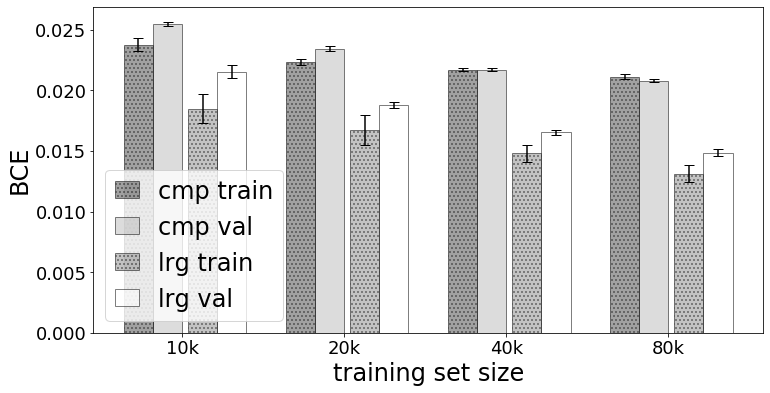

In [3]:
cmp_e2e_models = get_cmp_e2e_models()
lrg_e2e_models = get_lrg_e2e_models()

train_loss_means, train_loss_std, val_loss_means, val_loss_std = load_twin_train_val_losses(cmp_e2e_models, lrg_e2e_models)
plot_twin_train_val_losses(train_loss_means, train_loss_std, val_loss_means, val_loss_std, "e2e_training.png")

## Plot and Save Figure 7 (Hybrid Approach)

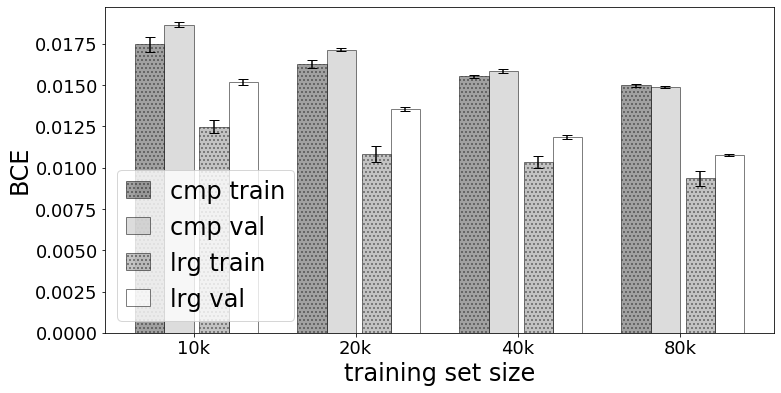

In [4]:
lrg_hybrid_models = get_lrg_hybrid_models()
cmp_hybrid_models = get_cmp_hybrid_models()

train_loss_means, train_loss_std, val_loss_means, val_loss_std = load_twin_train_val_losses(cmp_hybrid_models, lrg_hybrid_models)
plot_twin_train_val_losses(train_loss_means, train_loss_std, val_loss_means, val_loss_std, "hybrid_training.png")